In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

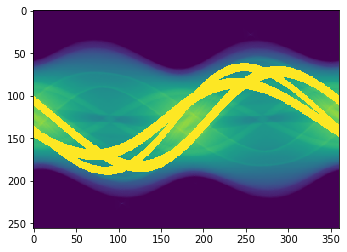

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [5]:
metal3_img.shape

(256, 360)

In [6]:
for i in range(256):
    if min(metal3_img[i]) < 0:
        print("x")
max(metal3_img[100])

300.0

In [7]:
result_img = metal3_img
window_size = 3

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(window_size, window_size, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [9]:
k = 0
for i in range(256-window_size-1):
    for j in range(360-window_size):
        if 0 in result_img[i:i+1+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j:j+window_size]:
                z = 0
            else:
                k = k+1

In [11]:
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))
k = 0
for i in range(256-window_size-1):
    for j in range(360-window_size):
        if 0 in result_img[i:i+1+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j:j+window_size]:
                z = 0
            else:
                for v in range(window_size):
                    for w in range(window_size):
                        train_data[k,w,v,0] = result_img[i+w,j+v]
                    result_data[k,0] = int(result_img[i+window_size,j])
                k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=10)

(55614, 3, 3, 1)
(55614, 1)
Epoch 1/10
1738/1738 [==============================] - 2s 1ms/step - loss: 3.9807 - accuracy: 0.2507
Epoch 2/10
1738/1738 [==============================] - 2s 1ms/step - loss: 3.1959 - accuracy: 0.2694
Epoch 3/10
1738/1738 [==============================] - 2s 1ms/step - loss: 2.7893 - accuracy: 0.2882
Epoch 4/10
1738/1738 [==============================] - 2s 1ms/step - loss: 2.6140 - accuracy: 0.2956
Epoch 5/10
1738/1738 [==============================] - 2s 1ms/step - loss: 2.5154 - accuracy: 0.3015
Epoch 6/10
1738/1738 [==============================] - 2s 1ms/step - loss: 2.4628 - accuracy: 0.3056
Epoch 7/10
1738/1738 [==============================] - 2s 1ms/step - loss: 2.4215 - accuracy: 0.3078
Epoch 8/10
1738/1738 [==============================] - 2s 1ms/step - loss: 2.3766 - accuracy: 0.3136
Epoch 9/10
1738/1738 [==============================] - 2s 1ms/step - loss: 2.3468 - accuracy: 0.3157
Epoch 10/10
1738/1738 [==============================]

In [13]:
l = 0
for i in range(256-window_size-1):
    for j in range(360-window_size):
        if result_img[i+window_size,j] == 300:
            test_data = np.zeros((1,window_size,window_size,1))
            for v in range(window_size):
                for w in range(window_size):
                    test_data[0,w,v,0] = result_img[i+w,j+v]
            prediction = model.predict(test_data)
            result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]
            print(np.where(prediction[0]==max(prediction[0]))[0][0])
            l = l+1

    k = 0
    z = 0

    for i in range(256-window_size-1):
        for j in range(360-window_size):
            if 0 in result_img[i:i+window_size+1,j:j+window_size]:
                z=0
            else:
                if 300 in result_img[i:i+window_size+1,j+window_size]:
                    z = 0
                else:
                    k = k+1
    train_data = np.zeros((k,window_size,window_size,1))
    result_data = np.zeros((k,1))
            
    k = 0

    for i in range(256-window_size-1):
        for j in range(30):
            if 0 in result_img[i:i+1+window_size,j:j+window_size]:
                z=0
            else:
                if 300 in result_img[i:i+1+window_size,j:j+window_size]:
                    z = 0
                else:
                    for v in range(window_size):
                        for w in range(window_size):
                            train_data[k,w,v,0] = result_img[i+w,j+v]
                        result_data[k,0] = int(result_img[i+window_size,j])
                    k = k+1
    model.fit(train_data, result_data, epochs=10)

Epoch 1/10
1765/1765 [==============================] - 2s 1ms/step - loss: 0.2636 - accuracy: 0.9367
Epoch 2/10
1765/1765 [==============================] - 2s 1ms/step - loss: 0.1930 - accuracy: 0.9490
Epoch 3/10
1765/1765 [==============================] - 2s 1ms/step - loss: 0.2023 - accuracy: 0.9485
Epoch 4/10
1765/1765 [==============================] - 2s 1ms/step - loss: 0.2015 - accuracy: 0.9486
Epoch 5/10
1765/1765 [==============================] - 2s 1ms/step - loss: 0.1974 - accuracy: 0.9488
Epoch 6/10
1765/1765 [==============================] - 2s 1ms/step - loss: 0.1979 - accuracy: 0.9487
Epoch 7/10
1765/1765 [==============================] - 2s 1ms/step - loss: 0.1977 - accuracy: 0.9486
Epoch 8/10
1765/1765 [==============================] - 2s 1ms/step - loss: 0.1961 - accuracy: 0.9493
Epoch 9/10
1765/1765 [==============================] - 2s 1ms/step - loss: 0.1974 - accuracy: 0.9490
Epoch 10/10
1765/1765 [==============================] - 2s 1ms/step - loss: 0.192

1765/1765 [==============================] - 3s 1ms/step - loss: 0.1511 - accuracy: 0.9536
Epoch 2/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1519 - accuracy: 0.9531
Epoch 3/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1524 - accuracy: 0.9532
Epoch 4/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1511 - accuracy: 0.9533
Epoch 5/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1515 - accuracy: 0.9538
Epoch 6/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1486 - accuracy: 0.9537
Epoch 7/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1510 - accuracy: 0.9537
Epoch 8/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1524 - accuracy: 0.9530
Epoch 9/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1503 - accuracy: 0.9537
Epoch 10/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1516 - accurac

1765/1765 [==============================] - 3s 1ms/step - loss: 0.1431 - accuracy: 0.9553
Epoch 2/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1410 - accuracy: 0.9548
Epoch 3/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1388 - accuracy: 0.9549
Epoch 4/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1415 - accuracy: 0.9551
Epoch 5/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1409 - accuracy: 0.9552
Epoch 6/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1402 - accuracy: 0.9551
Epoch 7/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1405 - accuracy: 0.9551
Epoch 8/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1415 - accuracy: 0.9555
Epoch 9/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1417 - accuracy: 0.9551
Epoch 10/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1389 - accurac

1765/1765 [==============================] - 3s 1ms/step - loss: 0.1320 - accuracy: 0.9562
Epoch 2/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1331 - accuracy: 0.9562
Epoch 3/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1381 - accuracy: 0.9560
Epoch 4/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1313 - accuracy: 0.9569
Epoch 5/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1320 - accuracy: 0.9567
Epoch 6/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1381 - accuracy: 0.9562
Epoch 7/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1322 - accuracy: 0.9568
Epoch 8/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1386 - accuracy: 0.9559
Epoch 9/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1304 - accuracy: 0.9567
Epoch 10/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1332 - accurac

1765/1765 [==============================] - 3s 1ms/step - loss: 0.1328 - accuracy: 0.9565
Epoch 2/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1333 - accuracy: 0.9567
Epoch 3/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1322 - accuracy: 0.9574
Epoch 4/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1314 - accuracy: 0.9564
Epoch 5/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1355 - accuracy: 0.9566
Epoch 6/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1338 - accuracy: 0.9570
Epoch 7/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1331 - accuracy: 0.9564
Epoch 8/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1316 - accuracy: 0.9572
Epoch 9/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1320 - accuracy: 0.9570
Epoch 10/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1344 - accurac

1765/1765 [==============================] - 3s 1ms/step - loss: 0.1247 - accuracy: 0.9580
Epoch 2/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1273 - accuracy: 0.9581
Epoch 3/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1261 - accuracy: 0.9580
Epoch 4/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1232 - accuracy: 0.9585
Epoch 5/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1268 - accuracy: 0.9576
Epoch 6/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1284 - accuracy: 0.9583
Epoch 7/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1243 - accuracy: 0.9585
Epoch 8/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1261 - accuracy: 0.9581
Epoch 9/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1271 - accuracy: 0.9578
Epoch 10/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1271 - accurac

1765/1765 [==============================] - 3s 1ms/step - loss: 0.1313 - accuracy: 0.9581
Epoch 1/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1236 - accuracy: 0.9590
Epoch 2/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1222 - accuracy: 0.9587
Epoch 3/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1251 - accuracy: 0.9585
Epoch 4/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1218 - accuracy: 0.9585
Epoch 5/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1206 - accuracy: 0.9591
Epoch 6/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1250 - accuracy: 0.9589
Epoch 7/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1252 - accuracy: 0.9583
Epoch 8/10
1765/1765 [==============================] - 3s 1ms/step - loss: 0.1234 - accuracy: 0.9592
Epoch 9/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1197 - accuracy

1765/1765 [==============================] - 3s 2ms/step - loss: 0.1205 - accuracy: 0.9596
Epoch 1/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1190 - accuracy: 0.9599
Epoch 2/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1169 - accuracy: 0.9597
Epoch 3/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1185 - accuracy: 0.9592
Epoch 4/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1167 - accuracy: 0.9594
Epoch 5/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1200 - accuracy: 0.9595
Epoch 6/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1187 - accuracy: 0.9589
Epoch 7/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1197 - accuracy: 0.9601
Epoch 8/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1238 - accuracy: 0.9591
Epoch 9/10
1765/1765 [==============================] - 3s 2ms/step - loss: 0.1165 - accuracy

1770/1770 [==============================] - 3s 2ms/step - loss: 0.1146 - accuracy: 0.9600
Epoch 4/10
1770/1770 [==============================] - 3s 2ms/step - loss: 0.1226 - accuracy: 0.9596
Epoch 5/10
1770/1770 [==============================] - 3s 2ms/step - loss: 0.1173 - accuracy: 0.9596
Epoch 6/10
1770/1770 [==============================] - 3s 2ms/step - loss: 0.1173 - accuracy: 0.9595
Epoch 7/10
1770/1770 [==============================] - 4s 2ms/step - loss: 0.1111 - accuracy: 0.9613
Epoch 8/10
1770/1770 [==============================] - 3s 2ms/step - loss: 0.1198 - accuracy: 0.9595
Epoch 9/10
1770/1770 [==============================] - 3s 2ms/step - loss: 0.1187 - accuracy: 0.9606
Epoch 10/10
1770/1770 [==============================] - 3s 2ms/step - loss: 0.1148 - accuracy: 0.9599
121
127
133
138
142
145
147
148
148
148
155
151
151
155
155
155
162
156
156
150
142
136
124
119
110
110
106
104
104
104
112
119
131
133
138
138
142
142
142
142
142
136
130
133
136
136
136
136
13

1789/1789 [==============================] - 4s 2ms/step - loss: 0.1139 - accuracy: 0.9610
Epoch 3/10
1789/1789 [==============================] - 3s 2ms/step - loss: 0.1148 - accuracy: 0.9608
Epoch 4/10
1789/1789 [==============================] - 4s 2ms/step - loss: 0.1164 - accuracy: 0.9610
Epoch 5/10
1789/1789 [==============================] - 3s 2ms/step - loss: 0.1127 - accuracy: 0.9609
Epoch 6/10
1789/1789 [==============================] - 3s 2ms/step - loss: 0.1111 - accuracy: 0.9608
Epoch 7/10
1789/1789 [==============================] - 4s 2ms/step - loss: 0.1174 - accuracy: 0.9601
Epoch 8/10
1789/1789 [==============================] - 4s 2ms/step - loss: 0.1137 - accuracy: 0.9608
Epoch 9/10
1789/1789 [==============================] - 4s 2ms/step - loss: 0.1149 - accuracy: 0.9615
Epoch 10/10
1789/1789 [==============================] - 4s 2ms/step - loss: 0.1153 - accuracy: 0.9605
123
127
131
133
143
147
148
159
168
172
187
182
187
182
174
174
174
174
187
187
187
174
158


1807/1807 [==============================] - 4s 2ms/step - loss: 0.1116 - accuracy: 0.9621
Epoch 2/10
1807/1807 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9608
Epoch 3/10
1807/1807 [==============================] - 4s 2ms/step - loss: 0.1166 - accuracy: 0.9608
Epoch 4/10
1807/1807 [==============================] - 4s 2ms/step - loss: 0.1112 - accuracy: 0.9617
Epoch 5/10
1807/1807 [==============================] - 4s 2ms/step - loss: 0.1091 - accuracy: 0.9613
Epoch 6/10
1807/1807 [==============================] - 4s 2ms/step - loss: 0.1159 - accuracy: 0.9613
Epoch 7/10
1807/1807 [==============================] - 4s 2ms/step - loss: 0.1113 - accuracy: 0.9607
Epoch 8/10
1807/1807 [==============================] - 3s 2ms/step - loss: 0.1124 - accuracy: 0.9608
Epoch 9/10
1807/1807 [==============================] - 4s 2ms/step - loss: 0.1093 - accuracy: 0.9612
Epoch 10/10
1807/1807 [==============================] - 4s 2ms/step - loss: 0.1109 - accurac

98
90
92
111
137
169
168
189
189
189
193
189
168
168
162
169
168
189
180
180
168
168
162
156
141
132
119
105
86
70
70
73
61
62
87
92
121
135
137
137
132
130
118
249
249
249
249
197
200
146
198
137
113
111
119
137
169
168
174
169
177
177
177
177
180
180
180
180
180
180
180
180
180
180
180
180
180
180
189
189
180
180
180
168
168
168
Epoch 1/10
1830/1830 [==============================] - 4s 2ms/step - loss: 0.1129 - accuracy: 0.9622
Epoch 2/10
1830/1830 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9627
Epoch 3/10
1830/1830 [==============================] - 4s 2ms/step - loss: 0.1113 - accuracy: 0.9621
Epoch 4/10
1830/1830 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9621
Epoch 5/10
1830/1830 [==============================] - 4s 2ms/step - loss: 0.1156 - accuracy: 0.9612
Epoch 6/10
1830/1830 [==============================] - 4s 2ms/step - loss: 0.1111 - accuracy: 0.9618
Epoch 7/10
1830/1830 [==============================] -

1849/1849 [==============================] - 4s 2ms/step - loss: 0.1072 - accuracy: 0.9631
Epoch 8/10
1849/1849 [==============================] - 4s 2ms/step - loss: 0.1124 - accuracy: 0.9629
Epoch 9/10
1849/1849 [==============================] - 4s 2ms/step - loss: 0.1083 - accuracy: 0.9628
Epoch 10/10
1849/1849 [==============================] - 4s 2ms/step - loss: 0.1055 - accuracy: 0.9632
177
190
190
190
190
195
190
195
197
198
195
198
119
86
61
57
51
51
51
43
36
35
32
46
4
169
169
186
186
198
207
201
203
203
198
190
190
177
146
111
86
70
73
58
53
51
48
51
43
121
36
150
17
6
17
32
252
46
187
169
169
112
145
59
249
5
248
32
15
38
46
198
190
193
190
177
177
174
174
174
169
169
169
169
166
166
166
166
190
195
195
195
195
195
195
190
177
169
169
169
207
207
201
201
198
199
199
199
198
195
195
195
197
197
195
197
199
198
Epoch 1/10
1853/1853 [==============================] - 4s 2ms/step - loss: 0.1093 - accuracy: 0.9627
Epoch 2/10
1853/1853 [==============================] - 4s 2ms/s

1876/1876 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9633
Epoch 2/10
1876/1876 [==============================] - 4s 2ms/step - loss: 0.1090 - accuracy: 0.9631
Epoch 3/10
1876/1876 [==============================] - 4s 2ms/step - loss: 0.1079 - accuracy: 0.9628
Epoch 4/10
1876/1876 [==============================] - 4s 2ms/step - loss: 0.1111 - accuracy: 0.9621
Epoch 5/10
1876/1876 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9632
Epoch 6/10
1876/1876 [==============================] - 4s 2ms/step - loss: 0.1108 - accuracy: 0.9634
Epoch 7/10
1876/1876 [==============================] - 4s 2ms/step - loss: 0.1054 - accuracy: 0.9636
Epoch 8/10
1876/1876 [==============================] - 4s 2ms/step - loss: 0.1088 - accuracy: 0.9626
Epoch 9/10
1876/1876 [==============================] - 4s 2ms/step - loss: 0.1108 - accuracy: 0.9636
Epoch 10/10
1876/1876 [==============================] - 4s 2ms/step - loss: 0.1058 - accurac

227
246
234
240
249
Epoch 1/10
1898/1898 [==============================] - 3s 2ms/step - loss: 0.1027 - accuracy: 0.9635
Epoch 2/10
1898/1898 [==============================] - 3s 2ms/step - loss: 0.1142 - accuracy: 0.9626
Epoch 3/10
1898/1898 [==============================] - 3s 2ms/step - loss: 0.1099 - accuracy: 0.9631
Epoch 4/10
1898/1898 [==============================] - 3s 2ms/step - loss: 0.1054 - accuracy: 0.9637
Epoch 5/10
1898/1898 [==============================] - 3s 2ms/step - loss: 0.1071 - accuracy: 0.9629
Epoch 6/10
1898/1898 [==============================] - 3s 2ms/step - loss: 0.1081 - accuracy: 0.9633
Epoch 7/10
1898/1898 [==============================] - 3s 2ms/step - loss: 0.1049 - accuracy: 0.9642
Epoch 8/10
1898/1898 [==============================] - 3s 2ms/step - loss: 0.1040 - accuracy: 0.9642
Epoch 9/10
1898/1898 [==============================] - 3s 2ms/step - loss: 0.1061 - accuracy: 0.9635
Epoch 10/10
1898/1898 [==============================] - 3s 2m

1916/1916 [==============================] - 4s 2ms/step - loss: 0.1041 - accuracy: 0.9640
Epoch 4/10
1916/1916 [==============================] - 4s 2ms/step - loss: 0.1009 - accuracy: 0.9645
Epoch 5/10
1916/1916 [==============================] - 4s 2ms/step - loss: 0.1160 - accuracy: 0.9629
Epoch 6/10
1916/1916 [==============================] - 4s 2ms/step - loss: 0.1074 - accuracy: 0.9638
Epoch 7/10
1916/1916 [==============================] - 4s 2ms/step - loss: 0.1039 - accuracy: 0.9633
Epoch 8/10
1916/1916 [==============================] - 4s 2ms/step - loss: 0.1060 - accuracy: 0.9636
Epoch 9/10
1916/1916 [==============================] - 4s 2ms/step - loss: 0.1117 - accuracy: 0.9631
Epoch 10/10
1916/1916 [==============================] - 4s 2ms/step - loss: 0.1070 - accuracy: 0.9643
249
249
249
249
249
249
249
233
229
233
214
214
209
209
204
199
199
204
204
206
214
214
229
241
249
249
249
249
241
233
211
234
5
206
204
232
46
3
228
249
4
204
249
4
174
169
169
196
199
199
199

Epoch 6/10
1933/1933 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9635
Epoch 7/10
1933/1933 [==============================] - 4s 2ms/step - loss: 0.1050 - accuracy: 0.9640
Epoch 8/10
1933/1933 [==============================] - 4s 2ms/step - loss: 0.1148 - accuracy: 0.9634
Epoch 9/10
1933/1933 [==============================] - 4s 2ms/step - loss: 0.1127 - accuracy: 0.9635
Epoch 10/10
1933/1933 [==============================] - 4s 2ms/step - loss: 0.1100 - accuracy: 0.9641
249
249
249
249
249
249
249
249
249
249
249
249
249
218
222
229
233
233
218
218
218
222
229
249
249
249
249
233
233
233
233
249
249
214
233
218
249
209
233
212
249
4
202
222
222
16
4
249
249
222
249
222
222
222
218
218
218
222
222
222
218
218
218
218
212
212
249
249
249
249
249
249
249
249
233
Epoch 1/10
1936/1936 [==============================] - 4s 2ms/step - loss: 0.1158 - accuracy: 0.9641
Epoch 2/10
1936/1936 [==============================] - 4s 2ms/step - loss: 0.1077 - accurac

1950/1950 [==============================] - 4s 2ms/step - loss: 0.1043 - accuracy: 0.9641
Epoch 10/10
1950/1950 [==============================] - 4s 2ms/step - loss: 0.1219 - accuracy: 0.9628
249
249
249
249
249
249
249
249
217
217
217
229
229
233
249
249
249
249
249
249
249
249
249
240
249
210
233
31
198
31
201
201
222
217
233
233
210
234
31
233
217
249
234
233
212
210
150
211
249
217
249
229
249
233
249
229
30
32
3
246
18
7
4
31
31
198
249
249
249
249
249
217
217
233
233
Epoch 1/10
1952/1952 [==============================] - 4s 2ms/step - loss: 0.1052 - accuracy: 0.9638
Epoch 2/10
1952/1952 [==============================] - 4s 2ms/step - loss: 0.1177 - accuracy: 0.9627
Epoch 3/10
1952/1952 [==============================] - 4s 2ms/step - loss: 0.1139 - accuracy: 0.9635
Epoch 4/10
1952/1952 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9630
Epoch 5/10
1952/1952 [==============================] - 4s 2ms/step - loss: 0.1137 - accuracy: 0.9624
Epoch 6/10

249
189
249
37
249
4
249
199
249
182
46
5
222
150
1
3
8
29
250
46
81
249
249
249
249
229
210
233
233
233
233
233
233
233
233
233
Epoch 1/10
1969/1969 [==============================] - 4s 2ms/step - loss: 0.1096 - accuracy: 0.9632
Epoch 2/10
1969/1969 [==============================] - 4s 2ms/step - loss: 0.1189 - accuracy: 0.9626
Epoch 3/10
1969/1969 [==============================] - 4s 2ms/step - loss: 0.1140 - accuracy: 0.9628
Epoch 4/10
1969/1969 [==============================] - 4s 2ms/step - loss: 0.1137 - accuracy: 0.9629
Epoch 5/10
1969/1969 [==============================] - 4s 2ms/step - loss: 0.1103 - accuracy: 0.9632
Epoch 6/10
1969/1969 [==============================] - 4s 2ms/step - loss: 0.1182 - accuracy: 0.9624
Epoch 7/10
1969/1969 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9627
Epoch 8/10
1969/1969 [==============================] - 4s 2ms/step - loss: 0.1145 - accuracy: 0.9626
Epoch 9/10
1969/1969 [==============================] -

1986/1986 [==============================] - 4s 2ms/step - loss: 0.1126 - accuracy: 0.9631
Epoch 3/10
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1205 - accuracy: 0.9626
Epoch 4/10
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1141 - accuracy: 0.9622
Epoch 5/10
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1190 - accuracy: 0.9626
Epoch 6/10
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1162 - accuracy: 0.9629
Epoch 7/10
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1117 - accuracy: 0.9630
Epoch 8/10
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1124 - accuracy: 0.9625
Epoch 9/10
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1146 - accuracy: 0.9625
Epoch 10/10
1986/1986 [==============================] - 4s 2ms/step - loss: 0.1165 - accuracy: 0.9630
207
207
217
207
207
207
207
207
207
207
207
207
207
197
211
222
249
229
225
229
229
229
249


2002/2002 [==============================] - 4s 2ms/step - loss: 0.1112 - accuracy: 0.9629
Epoch 6/10
2002/2002 [==============================] - 4s 2ms/step - loss: 0.1212 - accuracy: 0.9619
Epoch 7/10
2002/2002 [==============================] - 4s 2ms/step - loss: 0.1168 - accuracy: 0.9622
Epoch 8/10
2002/2002 [==============================] - 4s 2ms/step - loss: 0.1144 - accuracy: 0.9630
Epoch 9/10
2002/2002 [==============================] - 4s 2ms/step - loss: 0.1189 - accuracy: 0.9627
Epoch 10/10
2002/2002 [==============================] - 4s 2ms/step - loss: 0.1159 - accuracy: 0.9628
249
249
249
249
249
207
207
207
207
202
207
207
207
207
207
204
204
200
198
193
199
199
200
198
207
207
222
249
249
249
249
249
249
249
233
233
233
222
249
233
249
233
249
249
249
249
233
233
233
249
249
249
249
249
249
249
249
249
211
249
249
249
249
249
249
249
233
218
207
233
249
Epoch 1/10
2005/2005 [==============================] - 4s 2ms/step - loss: 0.1184 - accuracy: 0.9629
Epoch 2/10
2

2018/2018 [==============================] - 4s 2ms/step - loss: 0.1143 - accuracy: 0.9629
Epoch 9/10
2018/2018 [==============================] - 4s 2ms/step - loss: 0.1195 - accuracy: 0.9628
Epoch 10/10
2018/2018 [==============================] - 4s 2ms/step - loss: 0.1138 - accuracy: 0.9630
249
249
249
249
249
229
229
229
229
229
229
229
229
217
201
207
198
207
198
201
201
201
201
201
201
201
201
198
177
177
169
169
169
169
169
177
200
222
249
249
249
249
249
249
249
249
249
229
249
249
249
249
249
249
249
249
229
249
249
249
249
249
249
229
229
229
229
249
249
249
249
229
249
229
249
Epoch 1/10
2021/2021 [==============================] - 4s 2ms/step - loss: 0.1218 - accuracy: 0.9620
Epoch 2/10
2021/2021 [==============================] - 4s 2ms/step - loss: 0.1151 - accuracy: 0.9634
Epoch 3/10
2021/2021 [==============================] - 4s 2ms/step - loss: 0.1158 - accuracy: 0.9629
Epoch 4/10
2021/2021 [==============================] - 4s 2ms/step - loss: 0.1180 - accuracy: 0.9

2035/2035 [==============================] - 4s 2ms/step - loss: 0.1273 - accuracy: 0.9621
249
249
249
249
249
249
249
217
217
207
207
207
207
207
207
207
202
201
199
198
198
198
198
199
198
200
198
199
198
198
198
198
186
186
169
177
169
169
169
169
169
169
169
174
174
182
193
197
203
207
217
229
229
249
249
249
229
207
217
222
229
229
249
249
249
249
229
229
229
229
249
249
249
249
249
249
249
249
249
249
228
Epoch 1/10
2038/2038 [==============================] - 4s 2ms/step - loss: 0.1317 - accuracy: 0.9614
Epoch 2/10
2038/2038 [==============================] - 4s 2ms/step - loss: 0.1227 - accuracy: 0.9617
Epoch 3/10
2038/2038 [==============================] - 4s 2ms/step - loss: 0.1268 - accuracy: 0.9620
Epoch 4/10
2038/2038 [==============================] - 4s 2ms/step - loss: 0.1268 - accuracy: 0.9622
Epoch 5/10
2038/2038 [==============================] - 4s 2ms/step - loss: 0.1220 - accuracy: 0.9622
Epoch 6/10
2038/2038 [==============================] - 4s 2ms/step - loss:

2055/2055 [==============================] - 4s 2ms/step - loss: 0.1280 - accuracy: 0.9613
207
207
207
207
207
207
200
200
200
204
207
207
207
207
204
204
204
207
207
204
204
198
198
198
197
197
200
197
197
169
174
177
168
169
169
169
169
169
169
169
166
155
158
166
169
174
177
182
177
183
187
166
169
169
169
177
168
166
169
169
179
179
207
217
249
249
198
207
204
207
217
249
249
249
249
198
197
249
249
249
249
249
249
249
249
229
229
249
249
249
249
229
229
Epoch 1/10
2058/2058 [==============================] - 4s 2ms/step - loss: 0.1315 - accuracy: 0.9605
Epoch 2/10
2058/2058 [==============================] - 4s 2ms/step - loss: 0.1346 - accuracy: 0.9605
Epoch 3/10
2058/2058 [==============================] - 4s 2ms/step - loss: 0.1290 - accuracy: 0.9610
Epoch 4/10
2058/2058 [==============================] - 4s 2ms/step - loss: 0.1326 - accuracy: 0.9607
Epoch 5/10
2058/2058 [==============================] - 4s 2ms/step - loss: 0.1338 - accuracy: 0.9609
Epoch 6/10
2058/2058 [=====

2077/2077 [==============================] - 4s 2ms/step - loss: 0.1321 - accuracy: 0.9606
Epoch 7/10
2077/2077 [==============================] - 4s 2ms/step - loss: 0.1339 - accuracy: 0.9607
Epoch 8/10
2077/2077 [==============================] - 4s 2ms/step - loss: 0.1339 - accuracy: 0.9607
Epoch 9/10
2077/2077 [==============================] - 4s 2ms/step - loss: 0.1313 - accuracy: 0.9605
Epoch 10/10
2077/2077 [==============================] - 4s 2ms/step - loss: 0.1328 - accuracy: 0.9607
198
207
207
207
207
207
207
207
207
207
207
207
207
207
207
207
207
198
197
186
186
186
186
186
186
183
183
177
177
177
169
177
174
177
169
177
177
174
174
174
177
179
190
183
162
151
158
162
162
162
162
162
162
162
162
162
165
166
166
162
162
162
162
156
155
155
155
156
162
176
182
190
195
199
203
199
198
186
162
162
174
177
177
177
169
190
198
198
177
179
190
192
203
203
177
186
196
199
222
249
249
249
249
229
198
249
249
249
249
249
249
249
249
249
249
249
249
249
249
249
229
197
198
Epoch 1/

195
203
199
207
207
207
207
207
207
207
207
198
199
199
176
207
199
200
199
207
169
176
176
176
207
217
249
249
249
249
229
198
198
198
198
223
249
249
249
249
249
249
249
249
249
249
249
249
249
249
249
229
217
Epoch 1/10
2102/2102 [==============================] - 3s 2ms/step - loss: 0.1489 - accuracy: 0.9595
Epoch 2/10
2102/2102 [==============================] - 3s 2ms/step - loss: 0.1370 - accuracy: 0.9603
Epoch 3/10
2102/2102 [==============================] - 4s 2ms/step - loss: 0.1378 - accuracy: 0.9600
Epoch 4/10
2102/2102 [==============================] - 4s 2ms/step - loss: 0.1422 - accuracy: 0.9601
Epoch 5/10
2102/2102 [==============================] - 4s 2ms/step - loss: 0.1391 - accuracy: 0.9596
Epoch 6/10
2102/2102 [==============================] - 4s 2ms/step - loss: 0.1399 - accuracy: 0.9601
Epoch 7/10
2102/2102 [==============================] - 4s 2ms/step - loss: 0.1409 - accuracy: 0.9601
Epoch 8/10
2102/2102 [==============================] - 4s 2ms/step - loss

2121/2121 [==============================] - 4s 2ms/step - loss: 0.1374 - accuracy: 0.9605
Epoch 9/10
2121/2121 [==============================] - 4s 2ms/step - loss: 0.1378 - accuracy: 0.9604
Epoch 10/10
2121/2121 [==============================] - 5s 2ms/step - loss: 0.1399 - accuracy: 0.9605
207
207
207
207
207
207
207
207
207
207
207
207
198
198
207
207
207
207
198
198
198
198
197
193
169
169
169
170
172
197
166
176
176
176
174
170
176
193
190
169
169
176
176
174
185
176
200
198
207
207
207
207
207
207
207
207
207
198
198
150
162
166
158
162
162
154
158
166
176
176
190
199
203
203
207
217
249
229
229
198
177
169
169
169
169
169
197
203
207
211
249
249
249
249
249
249
249
249
249
249
249
249
249
249
249
Epoch 1/10
2125/2125 [==============================] - 4s 2ms/step - loss: 0.1403 - accuracy: 0.9601
Epoch 2/10
2125/2125 [==============================] - 4s 2ms/step - loss: 0.1342 - accuracy: 0.9605
Epoch 3/10
2125/2125 [==============================] - 4s 2ms/step - loss: 0.13

2144/2144 [==============================] - 4s 2ms/step - loss: 0.1313 - accuracy: 0.9612
Epoch 6/10
2144/2144 [==============================] - 4s 2ms/step - loss: 0.1395 - accuracy: 0.9609
Epoch 7/10
2144/2144 [==============================] - 4s 2ms/step - loss: 0.1357 - accuracy: 0.9608
Epoch 8/10
2144/2144 [==============================] - 4s 2ms/step - loss: 0.1328 - accuracy: 0.9608
Epoch 9/10
2144/2144 [==============================] - 4s 2ms/step - loss: 0.1371 - accuracy: 0.9608
Epoch 10/10
2144/2144 [==============================] - 4s 2ms/step - loss: 0.1329 - accuracy: 0.9609
20
146
7
14
17
38
233
148
46
203
164
250
148
47
250
150
151
150
148
145
207
207
207
207
207
207
198
198
193
193
126
129
129
126
129
131
129
126
125
130
155
170
176
185
195
203
203
198
207
198
207
217
217
229
217
217
198
193
193
169
169
169
169
169
169
169
169
169
169
174
195
199
203
203
207
217
249
249
249
249
249
249
249
249
249
249
249
249
229
Epoch 1/10
2147/2147 [============================

2163/2163 [==============================] - 4s 2ms/step - loss: 0.1317 - accuracy: 0.9610
Epoch 5/10
2163/2163 [==============================] - 4s 2ms/step - loss: 0.1333 - accuracy: 0.9612
Epoch 6/10
2163/2163 [==============================] - 4s 2ms/step - loss: 0.1337 - accuracy: 0.9611
Epoch 7/10
2163/2163 [==============================] - 4s 2ms/step - loss: 0.1325 - accuracy: 0.9610
Epoch 8/10
2163/2163 [==============================] - 4s 2ms/step - loss: 0.1298 - accuracy: 0.9614
Epoch 9/10
2163/2163 [==============================] - 4s 2ms/step - loss: 0.1309 - accuracy: 0.9612
Epoch 10/10
2163/2163 [==============================] - 4s 2ms/step - loss: 0.1306 - accuracy: 0.9613
249
249
4
193
156
151
137
126
111
104
113
120
132
136
136
136
136
137
151
151
151
151
148
151
151
151
151
166
168
195
195
195
199
197
203
207
217
207
207
207
195
36
153
16
16
189
187
187
193
199
203
203
207
207
217
249
249
249
249
249
249
249
249
249
217
217
207
207
207
199
193
193
193
195
199
2

2181/2181 [==============================] - 4s 2ms/step - loss: 0.1343 - accuracy: 0.9609
Epoch 10/10
2181/2181 [==============================] - 4s 2ms/step - loss: 0.1279 - accuracy: 0.9620
180
182
193
195
199
199
200
198
198
198
198
197
198
176
198
200
207
217
153
36
203
168
143
Epoch 1/10
2183/2183 [==============================] - 4s 2ms/step - loss: 0.1303 - accuracy: 0.9613
Epoch 2/10
2183/2183 [==============================] - 4s 2ms/step - loss: 0.1301 - accuracy: 0.9619
Epoch 3/10
2183/2183 [==============================] - 4s 2ms/step - loss: 0.1259 - accuracy: 0.9622
Epoch 4/10
2183/2183 [==============================] - 4s 2ms/step - loss: 0.1308 - accuracy: 0.9615
Epoch 5/10
2183/2183 [==============================] - 4s 2ms/step - loss: 0.1281 - accuracy: 0.9622
Epoch 6/10
2183/2183 [==============================] - 4s 2ms/step - loss: 0.1294 - accuracy: 0.9618
Epoch 7/10
2183/2183 [==============================] - 4s 2ms/step - loss: 0.1272 - accuracy: 0.9622
E

2185/2185 [==============================] - 4s 2ms/step - loss: 0.1323 - accuracy: 0.9617
Epoch 9/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1286 - accuracy: 0.9623
Epoch 10/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1243 - accuracy: 0.9626
Epoch 1/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1274 - accuracy: 0.9619
Epoch 2/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1262 - accuracy: 0.9623
Epoch 3/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1260 - accuracy: 0.9620
Epoch 4/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1264 - accuracy: 0.9623
Epoch 5/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1274 - accuracy: 0.9624
Epoch 6/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1290 - accuracy: 0.9624
Epoch 7/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1246 - accurac

2185/2185 [==============================] - 3s 2ms/step - loss: 0.1250 - accuracy: 0.9624
Epoch 9/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1388 - accuracy: 0.9620
Epoch 10/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1198 - accuracy: 0.9634
Epoch 1/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1257 - accuracy: 0.9627
Epoch 2/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1323 - accuracy: 0.9621
Epoch 3/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1273 - accuracy: 0.9625
Epoch 4/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1251 - accuracy: 0.9626
Epoch 5/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1246 - accuracy: 0.9626
Epoch 6/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1311 - accuracy: 0.9620
Epoch 7/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1272 - accurac

2185/2185 [==============================] - 3s 2ms/step - loss: 0.1216 - accuracy: 0.9633
Epoch 9/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1217 - accuracy: 0.9626
Epoch 10/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1301 - accuracy: 0.9620
Epoch 1/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1225 - accuracy: 0.9626
Epoch 2/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1237 - accuracy: 0.9620
Epoch 3/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1220 - accuracy: 0.9627
Epoch 4/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1205 - accuracy: 0.9634
Epoch 5/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1222 - accuracy: 0.9625
Epoch 6/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1258 - accuracy: 0.9624
Epoch 7/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1252 - accurac

2185/2185 [==============================] - 4s 2ms/step - loss: 0.1205 - accuracy: 0.9629
Epoch 9/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1226 - accuracy: 0.9630
Epoch 10/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1229 - accuracy: 0.9631
Epoch 1/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1244 - accuracy: 0.9624
Epoch 2/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1187 - accuracy: 0.9630
Epoch 3/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1249 - accuracy: 0.9628
Epoch 4/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1229 - accuracy: 0.9626
Epoch 5/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1223 - accuracy: 0.9633
Epoch 6/10
2185/2185 [==============================] - 5s 2ms/step - loss: 0.1291 - accuracy: 0.9623
Epoch 7/10
2185/2185 [==============================] - 5s 2ms/step - loss: 0.1302 - accurac

2185/2185 [==============================] - 3s 2ms/step - loss: 0.1177 - accuracy: 0.9637
Epoch 9/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1205 - accuracy: 0.9630
Epoch 10/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1271 - accuracy: 0.9621
Epoch 1/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1217 - accuracy: 0.9629
Epoch 2/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1295 - accuracy: 0.9625
Epoch 3/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1220 - accuracy: 0.9624
Epoch 4/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1261 - accuracy: 0.9627
Epoch 5/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1202 - accuracy: 0.9635
Epoch 6/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1258 - accuracy: 0.9623
Epoch 7/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1267 - accurac

2185/2185 [==============================] - 3s 2ms/step - loss: 0.1191 - accuracy: 0.9631
Epoch 9/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1253 - accuracy: 0.9624
Epoch 10/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1215 - accuracy: 0.9625
Epoch 1/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1216 - accuracy: 0.9627
Epoch 2/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1231 - accuracy: 0.9627
Epoch 3/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1246 - accuracy: 0.9628
Epoch 4/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1195 - accuracy: 0.9633
Epoch 5/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1217 - accuracy: 0.9636
Epoch 6/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1220 - accuracy: 0.9632
Epoch 7/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1253 - accurac

2185/2185 [==============================] - 3s 2ms/step - loss: 0.1238 - accuracy: 0.9627
Epoch 9/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1231 - accuracy: 0.9628
Epoch 10/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1201 - accuracy: 0.9631
Epoch 1/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1272 - accuracy: 0.9624
Epoch 2/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1221 - accuracy: 0.9630
Epoch 3/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1245 - accuracy: 0.9626
Epoch 4/10
2185/2185 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9631
Epoch 5/10
2185/2185 [==============================] - ETA: 0s - loss: 0.1249 - accuracy: 0.96 - 4s 2ms/step - loss: 0.1246 - accuracy: 0.9626
Epoch 6/10
2185/2185 [==============================] - 3s 2ms/step - loss: 0.1257 - accuracy: 0.9630
Epoch 7/10
2185/2185 [============================

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

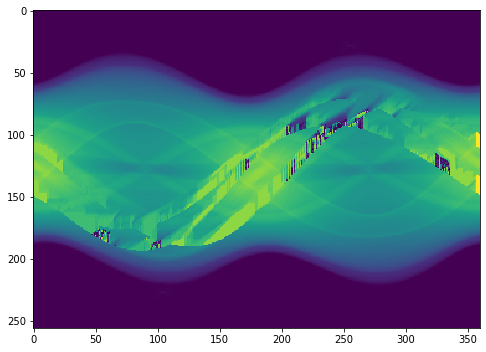

In [14]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:360])
plt.colorbar

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

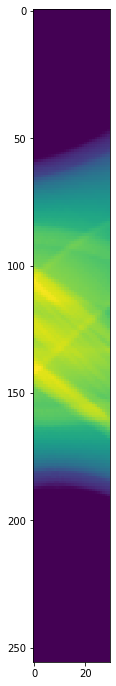

In [17]:
plt.figure(figsize=(8,12))
plt.imshow(metal0_img[:,0:30])
plt.colorbar

In [14]:
f = open("images/sino0.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [15]:
import numpy as np
metal0_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal0_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

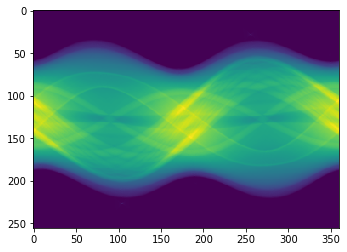

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal0_img)
plt.colorbar

In [ ]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/CNN_Metal3_3by3_training_img.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [ ]:
# np.savetxt('images/CNN_Metal3_3by3_training_txt.txt', result_img)